In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import scipy.optimize as opt
from tqdm import tqdm
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [51]:
filename = 'pareto_low_adv_refit.csv'  
t_eq=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/'+filename)

df_full = pd.read_csv('SMBH_Data_03_06_24.csv',header=1)

In [52]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)',
       'GJC23log(SFR)','GJC23log(sSFR)','log<Sigma>_e','log<Sigma>_h','M_BH']

easy_obs_para=['LogSigma0','Concentration_Index','logSigma0sph','log_sigma0','dc','logRhphi','M*_sph','ube','bri25','bve','bvtc','logR10phi','M*_gal','log_B/T',
 'logRh','log_n_sph_eq','blum','log_R_e_sph_maj','logblum','log_n_sph_maj','logR10','Pseudobulge','AGN','Multiple','Ring','BCG','Disk','cD',
 'Bar','Core','Compactness','ETG','T-type','log10(R10_kpc)','log10(R90_kpc)','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)','M_BH']

#low_scatter_para.append('M_BH_std_sym')
#easy_obs_para.append('M_BH_std_sym')
std_white_list=['ube_std', 'bri25_std', 'bve_std', 'Pseudobulge_std', 'AGN_std', 'Multiple_std', 'Ring_std', 'BCG_std', 'Disk_std', 'cD_std', 'Bar_std', 'Core_std', 'Compactness_std', 'ETG_std', 'M_BH_std']

In [53]:
easy_obs_para_std=easy_obs_para.copy()
for i in easy_obs_para:
    easy_obs_para_std.append(i+'_std')

low_scatter_para.append('M_BH_std_sym')
easy_obs_para.append('M_BH_std_sym')

# remove std_white_list from easy_obs_para_std
for i in std_white_list:
    easy_obs_para_std.remove(i)

In [54]:
df=df_full[easy_obs_para]
df=df.dropna()
len(df)

93

In [55]:
df=df_full[easy_obs_para_std]
# drop the column with all nan
df=df.dropna(axis=1,how='all')
df=df.dropna()
len(df)

28

In [56]:
df=df_full[low_scatter_para]
df=df.dropna()
len(df)

93

In [57]:
df=df_full[low_scatter_para+['log_sigma0_std','logR10_std']]
df=df.dropna()
len(df)

93

In [58]:
bic = -2*t_eq['LLL']+np.log(len(df))*(t_eq['number_constants']+1+t_eq['unique_number_variables']*len(df))
t_eq['BIC']=bic
#t_eq[t_eq['complexity']==7]
t_eq[t_eq['BIC']==t_eq['BIC'].min()]

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,evolutions,iterations,fitting_format,num_fitting_variables,initial_constant_guess,LLL,intrinsic_scatter,refit_equation,refit_wrmse,BIC
333,6,0.086257,0.098615,(exp(x15 + -0.6178318492957176) + 3.0211672945...,0.539112047525658*exp(x15) + 3.0211672945342354,PySRFunction(X=>0.539112047525658*exp(x15) + 3...,2,{'x15'},1,1,1,503,p[0]*exp(x15) + p[1],2,"['0.539112047525658', '3.02116729453424']",-76.746522,0.423245,0.5158951241986962*exp(x15) + 3.110169491559339,0.107448,588.622596


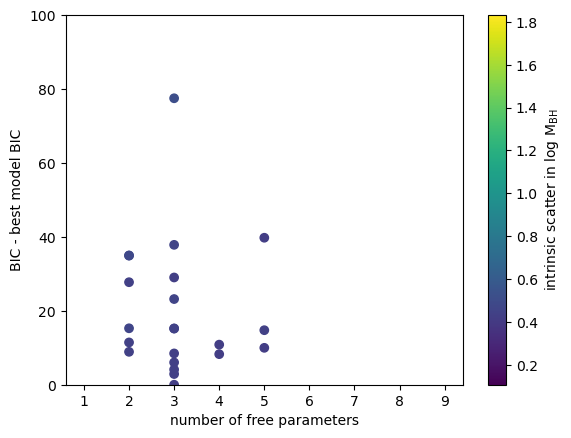

In [59]:
plt.scatter(t_eq['number_constants']+1,t_eq['BIC']-t_eq['BIC'].min(),c=t_eq['intrinsic_scatter'])
plt.xlabel('number of free parameters')
plt.ylabel('BIC - best model BIC')
plt.ylim(0,100)
#plt.yscale('log')
plt.colorbar().set_label(r'intrinsic scatter in log $\text{M}_\text{BH}$')

In [60]:
# sort t_eq by BIC
t_test=t_eq.sort_values(by='BIC')
t_test=t_eq[t_eq['unique_number_variables']==2]
t_test=t_test[t_test['complexity']==9]
t_test[:20]

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,evolutions,iterations,fitting_format,num_fitting_variables,initial_constant_guess,LLL,intrinsic_scatter,refit_equation,refit_wrmse,BIC
18,9,0.095096,7.236637e-02,((((x15 * x15) + 2.3109734995172695) + x19) - ...,x15**2 + x19 + 2.5475252829895229,PySRFunction(X=>x15**2 + x19 + 2.5475252829895...,2,"{'x19', 'x15'}",3,2,0,3,x15**p[1] + x19 + p[0],2,"['2.54752528298952', '2']",-62.525639,0.397042,x15**1.8967462943707307 + x19 + 2.943685010283141,0.100124,981.712582
65,9,0.088347,3.234647e-02,(((x15 ^ 1.6694534318850982) / 0.5501605800908...,1.0937271190448479**x65 + 1.817651129848046*x1...,PySRFunction(X=>1.0937271190448479**x65 + 1.81...,3,"{'x15', 'x65'}",2,2,0,22,p[1]**x65 + p[0]*x15**p[2],3,"['1.81765112984805', '1.09372711904485', '1.66...",-80.737721,0.439722,1.173655460551097**x65 + 1.9838167739222974*x1...,0.101841,1022.669346
69,9,0.052606,5.507922e-01,(((x15 * 4.853340721134725) - 1.18689221243684...,-1.1868922124368433**x42 + 4.853340721134725*x...,PySRFunction(X=>-1.1868922124368433**x42 + 4.8...,3,"{'x42', 'x15'}",2,2,0,30,-p[1]**x42 + p[0]*x15 - p[1],2,"['4.85334072113472', '1.18689221243684']",-53.970242,0.375173,-1.1764592296318694**x42 + 4.823823212689502*x...,0.056812,969.134388
208,9,0.087116,4.435462e-02,(((x15 * 4.254951371163566) - 1.30010114088601...,4.254951371163566*x15 - 0.70868538192694252*x9...,PySRFunction(X=>4.254951371163566*x15 - 0.7086...,3,"{'x9', 'x15'}",2,2,1,4,p[1]*x15 - p[0]*x9 - p[2],3,"['0.708685381926943', '4.25495137116357', '1.3...",-55.713965,0.383400,4.101677321039878*x15 - 0.6347236584689944*x9 ...,0.093450,972.621835
228,9,0.077052,9.629812e-02,(((x15 ^ 2.1018128569056267) - -2.091391093393...,x15**2.1018128569056267 + 2.091391093393626 + ...,PySRFunction(X=>x15**2.1018128569056267 + 2.09...,3,"{'x43', 'x15'}",2,2,1,15,x15**p[0] + p[1] + p[2]/x43,3,"['2.10181285690563', '2.09139109339363', '1.14...",-59.429557,0.377290,x15**1.9965449622391187 + 2.545585881267826 + ...,0.079443,980.053017
265,9,0.052631,1.461036e-01,(7.855434145866286 - (x42 - ((x51 ^ 1.13307923...,-x42 + x51**1.1330792354079853 + 8.52444941916...,PySRFunction(X=>-x42 + x51**1.1330792354079853...,3,"{'x42', 'x51'}",2,2,1,134,-x42 + x51**p[0] + p[1],2,"['1.13307923540799', '8.52444941916307']",-80.860119,0.424649,-x42 + x51**1.3031549737454453 + 8.09141360142696,0.069473,1022.914142
283,9,0.040259,2.800930e-01,((0.0737178984706489 - (x15 * -4.1396120753618...,4.1396120753618195*x15 - log(exp(x42))/log(10)...,PySRFunction(X=>4.1396120753618195*x15 - log(e...,2,"{'x42', 'x15'}",2,2,1,163,p[1]*x15 - log10(exp(x42)) + p[0],2,"['0.0737178984706489', '4.13961207536182']",-50.647399,0.355803,3.955308574701629*x15 - log10(exp(x42)) + 0.43...,0.046452,957.956103
387,9,0.135247,2.315211e-02,(((x75 + x53) + -0.1512079791323439) + (-0.925...,x53 + x75 - 1.143345800993719,PySRFunction(X=>x53 + x75 - 1.143345800993719),3,"{'x53', 'x75'}",2,2,2,0,x53 + x75 - p[0],1,['1.14334580099372'],-145.343724,0.599052,x53 + x75 - 1.1911607571649565,0.136132,1151.881352
497,9,0.044492,2.220177e-01,(((x15 * 4.338837868647326) - log10(exp(x43)))...,4.338837868647326*x15 - log(exp(x43))/log(10) ...,PySRFunction(X=>4.338837868647326*x15 - log(ex...,2,"{'x43', 'x15'}",2,2,2,209,p[1]*x15 - log10(exp(x43)) - p[0],2,"['0.39482327312247', '4.33883786864733']",-58.905267,0.380700,4.057882714773964*x15 - log10(exp(x43)) - -0.1...,0.051845,974.471838
518,9,0.039939,2.234457e-01,(((x15 * 4.238307301714486) - log10(exp(x42)))...,4.238307301714486*x15 - log(exp(x42))/log(10) ...,PySRFunction(X=>4.238307301714486*x15 - log(ex...,2,"{'x42', 'x15'}",2,2,2,284,p[1]*x15 - log10(exp(x42)) - p[0],2,"['0.146669187007367', '4.23830730171449']",-51.449439,0.355803,3.9553070023088286*x15 - log10(exp(x42)) - -0....,0.046452,959.560182


In [61]:
t_eq.iloc[65]

complexity                                                                 9
loss                                                                0.088347
score                                                               0.032346
equation                   (((x15 ^ 1.6694534318850982) / 0.5501605800908...
sympy_format               1.0937271190448479**x65 + 1.817651129848046*x1...
lambda_format              PySRFunction(X=>1.0937271190448479**x65 + 1.81...
number_constants                                                           3
variables                                                     {'x15', 'x65'}
number_variables                                                           2
unique_number_variables                                                    2
evolutions                                                                 0
iterations                                                                22
fitting_format                                    p[1]**x65 + p[0]*x15**p[2]

In [62]:
low_scatter_para[65]

'logR10'

In [63]:
low_scatter_para[15]

'log_sigma0'

In [64]:
df=df[['M_BH','M_BH_std_sym','log_sigma0','log_sigma0_std','logR10','logR10_std']]
df

,M_BH,M_BH_std_sym,log_sigma0,log_sigma0_std,logR10,logR10_std
1,9.380211,0.180956,2.471453,0.009328,1.541167,0.135507
3,9.102971,0.086075,2.515012,0.007217,1.269806,0.067568
6,5.740000,0.103967,1.538951,0.039173,-0.156477,0.101358
7,8.677184,0.099526,2.374180,0.008257,1.077954,0.065344
9,7.591065,0.194876,2.296073,0.006238,1.005459,0.102428
...,...,...,...,...,...,...
131,8.808460,0.027143,2.353474,0.006389,1.253884,0.016054
132,8.279168,0.052000,2.283934,0.020983,1.255475,0.023541
133,6.833669,0.101335,2.030762,0.014485,0.945146,0.018053
134,6.198130,0.108574,1.987443,0.024855,1.021620,0.008702


In [65]:
t_eq.iloc[65]['refit_equation']

'1.173655460551097**x65 + 1.9838167739222974*x15**1.5299898769767926'

In [66]:
import torch
from torch import nn, optim

# Convert the dataframe to PyTorch tensors
M_BH = torch.tensor(df['M_BH'].values, dtype=torch.float32)
M_BH_std_sym = torch.tensor(df['M_BH_std_sym'].values, dtype=torch.float32)

logR10 = torch.tensor(df['logR10'].values, dtype=torch.float32)
logR10_std = torch.tensor(df['logR10_std'].values, dtype=torch.float32)
log_sigma0 = torch.tensor(df['log_sigma0'].values, dtype=torch.float32)
log_sigma0_std = torch.tensor(df['log_sigma0_std'].values, dtype=torch.float32)

# Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.p0 = nn.Parameter(torch.tensor(1.173655460551097, dtype=torch.float32))
        self.p1 = nn.Parameter(torch.tensor(1.9838167739222974, dtype=torch.float32))
        self.p2 = nn.Parameter(torch.tensor(1.5299898769767926, dtype=torch.float32))
        self.p3 = nn.Parameter(torch.tensor(t_eq.iloc[65]['intrinsic_scatter'], dtype=torch.float32))
        self.p4 = nn.Parameter(logR10.clone())
        self.p5 = nn.Parameter(log_sigma0.clone())

    def forward(self, i):
        return self.p0 ** self.p4[i] + self.p1 * self.p5[i] ** self.p2

# Instantiate the model
model = Model()

# Define the loss function
def loglikelihood():
    term0 = torch.log(torch.tensor(2 * torch.pi)) * len(df) * (t_eq.iloc[65]['unique_number_variables'] + 1)

    term1 = (torch.log(M_BH_std_sym**2 + model.p3**2)).sum()
    term1 += torch.log(logR10_std**2).sum()
    term1 += torch.log(log_sigma0_std**2).sum()
    
    term2 = ((M_BH - model(torch.arange(len(df))))**2 / (M_BH_std_sym**2 + model.p3**2)).sum()

    term3 = (((log_sigma0 - model.p5) / log_sigma0_std)**2).sum()
    term3 += (((logR10 - model.p4) / logR10_std)**2).sum()

    return term0 + term1 + term2 + term3

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    loss = loglikelihood()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}', model.p0.item(), model.p1.item(), model.p2.item(), model.p3.item())

# Get the optimized parameters
optimized_params = {name: param.data for name, param in model.named_parameters()}
print(optimized_params)

/home/zj448/miniconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:251: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [93]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /croot/pytorch-select_1700158693612/work/aten/src/ATen/native/Resize.cpp:28.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 0, Loss: -872.4113159179688 1.1636558771133423 1.9738171100616455 1.5399895906448364 0.44972172379493713
Epoch 100, Loss: -878.4766845703125 1.1733146905899048 1.9517251253128052 1.5510613918304443 0.4097220003604889
Epoch 200, Loss: -878.4879760742188 1.1721328496932983 1.9401181936264038 1.5583935976028442 0.4096180200576782
Epoch 300, Loss: -878.4881591796875 1.1717450618743896 1.9381600618362427 1.559680461883545 0.40959277749061584
Epoch 400, Loss: -878.4881591796875 1.1717193126678467 1.9380286931991577 1.5597667694091797 0.4095909893512726
Epoch 500, Loss: -878.4881591796875 1.171718716621399 1.9380260705947876 1.5597689151763916 0.4095909595489502
Epoch 600, Loss: -878.4881591796875 1.171718716621399 1.9380258321762085 1.559768795967102 0.4095909297466278
Epoch 700, Loss: -878.4881591796875 1.171718955039978 1.938025951385498 1.559768795967102 0.4095909893512726
Epoch 800, Loss: -878.4881591796875 1.171718716621399 1.9380260705947876 1.559768795967102 0.40959107875823975


In [67]:
loss

tensor(-878.4781, grad_fn=<AddBackward0>)

In [68]:
df['M_BH']-model(torch.arange(len(df))).detach().numpy()

1      0.152895
3     -0.285537
6      0.856139
7      0.024703
9     -0.663809
         ...   
131    0.222770
132    0.029314
133   -0.174942
134   -0.595056
142    0.468780
Name: M_BH, Length: 93, dtype: float64

(3.5, 10.0)

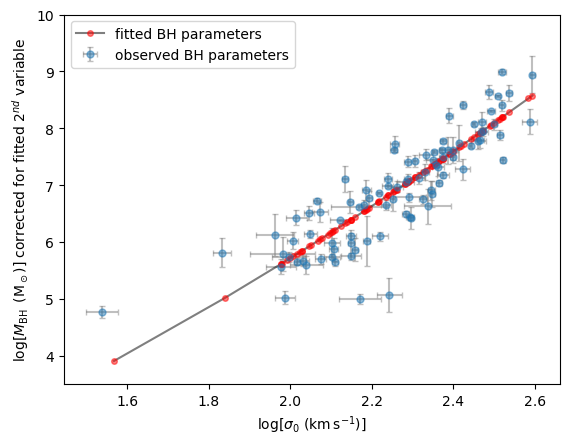

In [70]:
plt.errorbar(df['log_sigma0'],
            df['M_BH']-(model.p0.detach().numpy() ** model.p4.detach().numpy()),
            xerr=df['log_sigma0_std'],
            yerr=df['M_BH_std_sym'],
            label='observed BH parameters',
            fmt='o',alpha=0.5,ms=5,capsize=2,ecolor='grey')
order=np.argsort(model.p5.detach().numpy())
plt.plot(model.p5.detach().numpy()[order],
         (model.p1.detach().numpy()*(model.p5.detach().numpy()**model.p2.detach().numpy()))[order],
         'o-',label='fitted BH parameters',c='black',alpha=0.5,ms=4,mfc='red',mec='red')
plt.xlabel(r'$\log[\sigma_0 \,\, (\text{km}\,\text{s}^{-1})]$')
#plt.ylabel(r'$\log[{M}_\text{BH}\,\,\,(\text{M}_\odot)]-k\times\log[\rho_{soi}\,\,\,(\text{M}_\odot\,\text{pc}^{-3})]$')
plt.ylabel(r'$\log[{M}_\text{BH}\,\,\,(\text{M}_\odot)]$ corrected for fitted $2^{nd}$ variable')
plt.legend()
# plt.xlim(2.5,2.6)
plt.ylim(3.5,10)

(-2.5, 4.0)

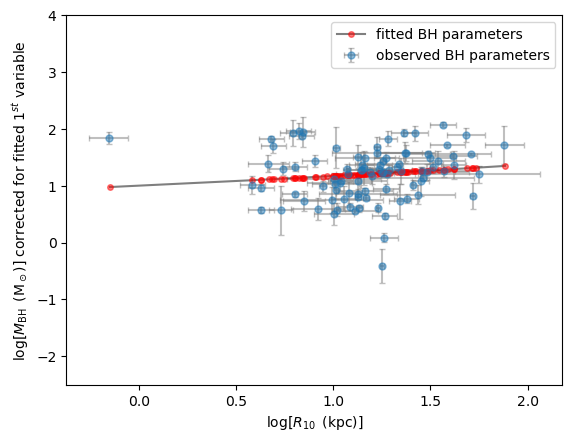

In [76]:
plt.errorbar(df['logR10'],
            df['M_BH']-(model.p1.detach().numpy() * (model.p5.detach().numpy() ** model.p2.detach().numpy())),
            xerr=df['logR10_std'],
            yerr=df['M_BH_std_sym'],
            label='observed BH parameters',
            fmt='o',alpha=0.5,ms=5,capsize=2,ecolor='grey')
order=np.argsort(model.p4.detach().numpy())
plt.plot(model.p4.detach().numpy()[order],
         (model.p0.detach().numpy()**model.p4.detach().numpy())[order],
         'o-',label='fitted BH parameters',c='black',alpha=0.5,ms=4,mfc='red',mec='red')
plt.xlabel(r'$\log[R_{10}\,\,\,(\text{kpc})]$')
plt.ylabel(r'$\log[{M}_\text{BH}\,\,\,(\text{M}_\odot)]$ corrected for fitted $1^{st}$ variable')
plt.legend()
# plt.xlim(2.5,2.6)
plt.ylim(-2.5,4)